<a href="https://colab.research.google.com/github/Icamtu/ML/blob/main/Assignment12_NLP_Emotion_Detection_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emotion Detection from text

Prepared by - Venkata Reddy Konasani

[statinfer.com](https://statinfer.com/)

# Objective 
The objective is to build a model that  detects the emotion hidden in the text comments. The emotons include happiness,sadness,worry, love etc.,

# Packages Installation

In [1]:
#!pip install nltk
#!pip install spacy

In [2]:
import pandas as pd
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

# Q1)Import the data

Get the dataset information and print few sample records

Dataset location - https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Final_Emotion_Data/Final_Emotion_Data.csv

In [3]:
emotion_data=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Final_Emotion_Data/Final_Emotion_Data.csv")

In [4]:
emotion_data.sample(10)

,Id,Emotion,Text
43183,43184,surprise,Got Six Feet Under series 1 on DVD
55219,55220,happiness,Happy Mothers Day to all my fellow mums - have...
48731,48732,relief,@alterna180 i sorry sweetpea... almost over with!
54810,54811,sadness,2 days after #all4web ...i'm still tired
10554,10555,happiness,i havent been feeling very sociable lately so ...
11230,11231,sadness,i make him feel unloved and unwanted
10842,10843,sadness,i feel a bit foolish even bothering to post an...
49821,49822,neutral,Tyring to pack for my Aruba trip (soul beach m...
35458,35459,worry,"Took calculus exam today, I think that I did w..."
16674,16675,neutral,ups ketauan cabut nih gimana dong


# Q2)Get the unique list of emotions and their frequency counts.

In [5]:
emotion_data['Emotion'].value_counts()


happiness     10571
sadness        9831
neutral        8638
worry          8459
love           5146
surprise       2759
anger          2269
fear           1937
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: Emotion, dtype: int64

# Q3)Text Preprocessing

Use a single function to perform all the pre-processing in one step. 

You need to take care of 


1. Expanded forms
2. Stopwords
3. Regular Expressions
4. Lemmatization 




**1,Expanded forms**

In [6]:
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring"}

# Expanded forms
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

# Stopwords
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})

# Regular Expressions
import re
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  return(x)

# Lemmatization
spacy_model = spacy.load('en_core_web_sm')

def pre_processing(input_data, text_col):
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  print(input_data[[text_col,"text_col_clean"]])

In [7]:
pre_processing(input_data=emotion_data, text_col="Text")

                                                    Text  \
0       im grabbing a minute to post i feel greedy wrong   
1                                i didnt feel humiliated   
2      i can go from feeling so hopeless to so damned...   
3      i am ever feeling nostalgic about the fireplac...   
4                                   i am feeling grouchy   
...                                                  ...   
55995                                   @JohnLloydTaylor   
55996                     Happy Mothers Day  All my love   
55997  Happy Mother's Day to all the mommies out ther...   
55998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
55999  @mopedronin bullet train from tokyo    the gf ...   

                                          text_col_clean  
0                 I m grab minute post feel greedy wrong  
1                                         feel humiliate  
2                  feel hopeless damn hopeful care awake  
3                 feel nostalgic fireplace 

# Q4)Create a word cloud and generate atleast two visualizations to highlight the most frequent words

Try different colour themes

# Word Cloud

In [8]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
final_text="".join(emotion_data["text_col_clean"])
len(final_text)

2378408

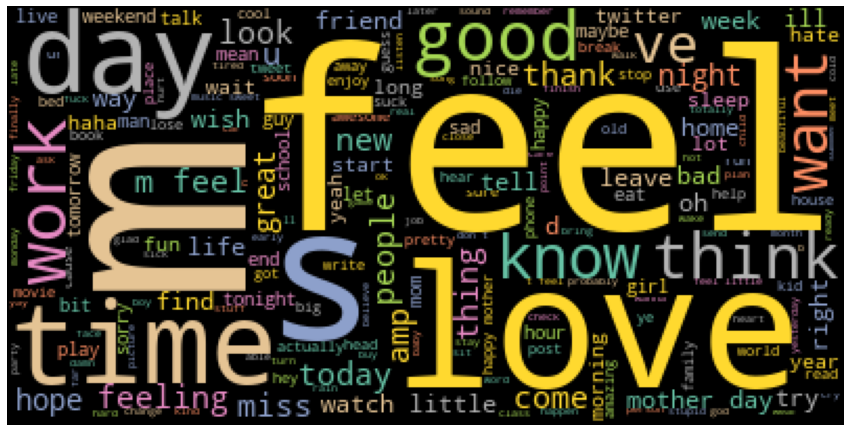

In [10]:
plt.figure(figsize = (15, 15), facecolor = None) 
wc=WordCloud(colormap='Set2').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

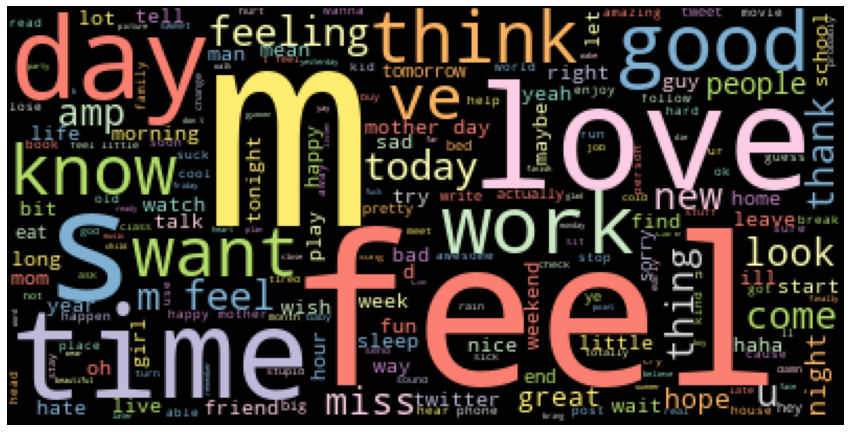

In [11]:
plt.figure(figsize = (15, 15), facecolor = None) 
wc=WordCloud(colormap='Set3').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

# Q5)Create a document term matrix. Keep the minimum frequency between  5 to 20. 


Note: If there are any missing values in the cleaned column. You need to drop the missing values before creating DTM

In [12]:
emotion_data["text_col_clean"].isnull().sum()

0

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df= 20) #minimum word freq=5
dtm_v1 = pd.DataFrame(countvec1.fit_transform(emotion_data["text_col_clean"]).toarray(), columns=countvec1.get_feature_names(), index=None)
print(dtm_v1.shape)
dtm_v1


(56000, 2228)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,ability,able,absolutely,abt,abuse,ac,accept,acceptable,access,...,york,young,youquot,youtube,yr,yum,yummy,yup,zombie,ãââ½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Q6) Build a Naive bayes model

Prepare train and Test data. Build the model and get the accuracy on train and test data

Note- Accuracy will be less


In [14]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              56000 non-null  int64 
 1   Emotion         56000 non-null  object
 2   Text            56000 non-null  object
 3   text_col_clean  56000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [15]:
emotion_data['Emotion'].value_counts()

happiness     10571
sadness        9831
neutral        8638
worry          8459
love           5146
surprise       2759
anger          2269
fear           1937
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: Emotion, dtype: int64

In [39]:
dtm_v1['emotion_label']=emotion_data['Emotion']

from sklearn.model_selection import train_test_split

X=dtm_v1.drop(['emotion_label'], axis=1)
y=dtm_v1['emotion_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('X_train shape\t:',X_train.shape)
print('y_train shape\t:',y_train.shape)
print('X_test shape\t:',X_test.shape)

X_train shape	: (44800, 2228)
y_train shape	: (44800,)
X_test shape	: (11200, 2228)


In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
#Fitting model to our data
model.fit(X_train, y_train)

MultinomialNB()

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np

pred_emotion=model.predict(X_test)
cm1 = confusion_matrix(y_test,pred_emotion)

labels = np.unique(y_test)
cm1=pd.DataFrame(cm1, index=labels, columns=labels)
cm1

,anger,boredom,empty,enthusiasm,fear,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
anger,0,0,0,0,0,0,100,0,0,0,0,346,0,0
boredom,0,0,0,0,0,0,12,0,0,0,0,22,0,0
empty,0,0,0,0,0,0,93,0,0,0,0,78,0,0
enthusiasm,0,0,0,0,0,0,108,0,0,0,0,49,0,0
fear,0,0,0,0,0,0,102,0,0,0,0,274,0,0
fun,0,0,0,0,0,0,265,0,0,0,0,85,0,0
happiness,0,0,0,0,0,0,1835,0,0,0,0,236,0,0
hate,0,0,0,0,0,0,70,0,0,0,0,218,0,0
love,0,0,0,0,0,0,838,0,0,0,0,236,0,0
neutral,0,0,0,0,0,0,1099,0,0,0,0,667,0,0


In [36]:
print("Train Accuracy\t:", model.score(X_train,y_train))
print("Test Accuracy\t:", model.score(X_test,y_test))

Train Accuracy	: 0.319375
Test Accuracy	: 0.3132142857142857


# Q7) Take only two emotions; Re-build the model

Keep only two emotions. Ignore rest of the data while building the model. Keep only happiness and sadness

Build the model and get the confusion matrix and accuracy

In [20]:
dtm_v1['emotion_label']=emotion_data['Emotion']
dtm_v2=dtm_v1[dtm_v1['emotion_label'].isin(["happiness", "sadness"])]


In [21]:
dtm_v2['emotion_label'].value_counts()

happiness    10571
sadness       9831
Name: emotion_label, dtype: int64

In [22]:
dtm_v2.columns

Index(['abandon', 'ability', 'able', 'absolutely', 'abt', 'abuse', 'ac',
       'accept', 'acceptable', 'access',
       ...
       'young', 'youquot', 'youtube', 'yr', 'yum', 'yummy', 'yup', 'zombie',
       'ãââ½', 'emotion_label'],
      dtype='object', length=2229)

In [23]:
X_2=dtm_v2.drop(['emotion_label'], axis=1)
y_2=dtm_v2['emotion_label']
print('x shape\t:',X_2.shape)
print('y shape\t:',y_2.shape)

x shape	: (20402, 2228)
y shape	: (20402,)


In [24]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2)

print('X_train_2 shape\t:',X_train_2.shape)
print('y_train_2 shape\t:',y_train_2.shape)
print('X_test_2 shape\t:',X_test_2.shape)
print('y_test_2 shape\t:',y_test_2.shape)


X_train_2 shape	: (16321, 2228)
y_train_2 shape	: (16321,)
X_test_2 shape	: (4081, 2228)
y_test_2 shape	: (4081,)


In [25]:
from sklearn.naive_bayes import MultinomialNB
model_2 = MultinomialNB()
#Fitting model to our data
model.fit(X_train_2, y_train_2)

MultinomialNB()

In [27]:
y_test_2


26026      sadness
2467       sadness
43239    happiness
13934    happiness
29438    happiness
           ...    
48227    happiness
47282    happiness
14217    happiness
2793     happiness
1688     happiness
Name: emotion_label, Length: 4081, dtype: object

In [35]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(X_train_2, y_train_2)
print("Train Accuracy\t:", model2.score(X_train_2,y_train_2))
print("Test Accuracy\t:", model2.score(X_test_2,y_test_2))

Train Accuracy	: 0.8779486551069174
Test Accuracy	: 0.8544474393530997


In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

pred_emotion_2=model2.predict(X_test_2)
cm2 = confusion_matrix(y_test_2,pred_emotion_2)

# labels = np.unique(y_test_2)
# cm2=pd.DataFrame(cm2, index=labels, columns=labels)
cm2

array([[1870,  264],
       [ 330, 1617]])

# Q8) Write down your final findings. How do you explain this project to a layman?


* Problem Statement 
* Overall Approach
* Challenges faced
* Accuracy of the final model

**Problem Statement:** To detects the emotion hidden in the text comments. The emotons include happiness,sadness,worry, love etc.,

**Overall Approach:** 

Step-1 is to convert text comments to Numerical data. 


Step-2 is to build model on numerical data

**Challenges faced:**
 1. To convert everything to string& lower case
 2. To Tokenize texts(breake into words)
 3. To Epand shortforms of words
 4. To remove Stop words(unnecessary words for Model building)
 5. To remove Regular Expressions(number,symbols,puntuations.html links,etc)
 6. To make Lemmatization/ Root form of words(creats,created,creating to create)

**Accuracy of the final model:** 

## Predicting for new data points

In [40]:
e1 ="Awesome experience. Go for it. It is a great place"
e2 ="Very bad day for me today. I would like to forget it as soon as possible"
emotion_list=[e1,e2]

In [41]:
new_comment= pd.DataFrame({"text":emotion_list})

#Spelling Correction
from textblob import TextBlob
new_comment["text_corrected"]=new_comment["text"].apply(lambda x:"".join(TextBlob(x).correct()))
pre_processing(input_data=new_comment, text_col="text_corrected")

                                      text_corrected  \
0  Awesome experience. To for it. It is a great p...   
1  Very bad day for me today. I would like to for...   

                       text_col_clean  
0      awesome experience great place  
1  bad day today forget soon possible  


In [43]:
countvec = CountVectorizer()
dtm_newcomment = pd.DataFrame(countvec.fit_transform(new_comment['text_col_clean']).toarray(), columns=countvec.get_feature_names(), index=None)
#print(dtm_newcomment)

dtm_v2=dtm_v1.drop(["emotion_label"],axis=1)
dtm_newcomment_final=pd.DataFrame(columns=dtm_v2.columns.values)
dtm_newcomment_final=dtm_newcomment_final.append(dtm_newcomment)
dtm_newcomment_final=dtm_newcomment_final.fillna(0)

In [44]:
print("****Make sure that New DTM and old DTM have same number of columns***")
print("New DTM Shape", dtm_newcomment_final.shape)
print("Overall DTM Shape",dtm_v2.shape)

New_words=[t for t in dtm_newcomment_final.columns.values if t not in dtm_v2.columns.values]
print("Count of new words =>", len(New_words))
print("New words are => ", New_words)

****Make sure that New DTM and old DTM have same number of columns***
New DTM Shape (2, 2228)
Overall DTM Shape (56000, 2228)
Count of new words => 0
New words are =>  []


In [45]:
result=pd.DataFrame()
result["text"]=new_comment["text"]
result["emotion_label"] = model2.predict(dtm_newcomment_final)
print(result)

                                                text emotion_label
0  Awesome experience. Go for it. It is a great p...     happiness
1  Very bad day for me today. I would like to for...       sadness
